<div class="alert alert-block alert-info">
    
<center> 
    
# __Lead-Lag Portfolios__ 
### __Portfolio Strategies and Empirical Results__ 
    
</center>

</div>

##### __Note__

All the methods required for generating lead-lag pairwise matrices and related directed networks, clustering directed networks, lead-lag-ranking, constructing portfolios, backtesting them, and visualizations are defined in the **`portfolio.py`** file within the context of the 'LeadLagPortfolio' class. It leverages other class objects and methods that are defined in the **`levy.py`** and **`hermitian.py`** files.


In [1]:
import sys
sys.path.append('../src')

import pandas as pd
from portfolio import LeadLagPortfolio

## __1. Introduction__

Now that we're familiar with the pairwise lead-lag metric of interest, Lévy area, and the Hermitian clustering of directed networks, we can introduce portfolio strategies based on the discovered lead-lag relationships to assess their economic significance. We will present three portfolio strategies: global and clustered portfolios, as introduced in the reference papers, and the global-clustered portfolio, proposed in this repository.

To identify lead-lag relationships and construct portfolios, a universe of financial instruments is essential. While the reference papers used the US equity market to demonstrate the economic significance of lead-lag portfolios, we have chosen a different market—cryptocurrencies. Our selected universe consists of cryptocurrencies utilized by a UK-based Quantitative Crypto Asset Management startup. This decision is intended to offer a novel perspective rather than replicate the findings of the reference papers. Let's begin by loading the daily price panel provided by the aforementioned source:

In [2]:
# Read daily price panel from the csv file located in the data folder of the repo
daily_price_panel = pd.read_csv('../data/crypto_daily_panel.csv', index_col=0, parse_dates=True)
daily_price_panel.columns

Index(['ADA', 'ALGO', 'ANKR', 'ATOM', 'BAND', 'BAT', 'BNB', 'BTC', 'BUSD',
       'CELR', 'CHZ', 'COS', 'DASH', 'DENT', 'DOCK', 'DOGE', 'DUSK', 'ENJ',
       'EOS', 'ETC', 'ETH', 'FET', 'FTM', 'FUN', 'HBAR', 'HOT', 'ICX', 'IOST',
       'LINK', 'LTC', 'MATIC', 'MTL', 'NEO', 'NULS', 'OMG', 'ONE', 'ONG',
       'ONT', 'PERL', 'QTUM', 'REN', 'RVN', 'TFUEL', 'THETA', 'TOMO', 'TRX',
       'VET', 'WAN', 'WAVES', 'WIN', 'XLM', 'XMR', 'XRP', 'XTZ', 'ZEC', 'ZIL',
       'ZRX'],
      dtype='object')

In the reference papers, other data frequencies, including bidiurnal, weekly, bi-weekly and monthly, were also examined. However, the best results were observed with the daily frequency. It's worth noting that the informational advantage gained from lead-lag relationships might decay more quickly at lower frequencies, potentially causing you to miss the benefits derived from higher frequency data. We encourage readers to explore these strategies with intraday data as well.

## __2. Generating Lead-Lag Score Matrices and Directed Networks__

Since we are utilizing the Lévy-area as the pairwise lead-lag metric, it is essential to define a lookback window within which a pair of assets are compared. According to the reference paper, the computation of the Lévy-area involves using assets that do not exhibit missing returns in the look-back window of preceding 30 trading days. Consequently, for our data-driven lead-lag portfolio, the Lévy-area between pairwise asset returns is calculated over a 30-day lookback window. You can arrange other experiments with different window sizes.

In summary, utilizing the loaded price panel, the initial step involves generating lead-lag scoring matrices for any given day in the panel over a backward-looking window size of 30. To construct a meaningful portfolio, it is imperative to have a minimum of 40 assets without missing data in the lookback window.

In [3]:
leadlag_port = LeadLagPortfolio(price_panel=daily_price_panel) 

# Generate lead-lag scoring matrices and corresponding directed networks 
leadlag_port.generate_matrices_and_networks(window_size=30, min_assets=40)

Generating Lead-Lag Scoring Matrices and Directed Networks: 100%|██████████| 2241/2241 [14:21<00:00,  2.60it/s] 


## __3. Evaluating Economic Significance of the Lead-Lag Portfolios__

Before delving into the specifics of lead-lag portfolios, it's crucial to highlight a key aspect of these strategies. Our primary objective is to implement and assess the economic significance of a cutting-edge methodology for those intrigued by the exploration of lead-lag relationships within the domain of multivariate time series systems. While these strategies may hold real-world value, our focus extends beyond immediate profitability.

We've employed an equal-weighted portfolio, encompassing all cryptocurrencies within our universe, as a representative benchmark for the market. It's important to note that this approach, while illustrative, may not align with realistic execution scenarios, and that is not our primary focus in this repository. For practical applications, we recommend creating a market proxy tailored to realistic execution scenarios.

### __3.1. Global Portfolio (GP)__

At each time $t$, we sort the assets based on their likelihood of being a leader or follower, utilizing the average of corresponding rows in the $S_{t-w}$ matrix. The top 20% of cryptocurrencies are considered the set of leaders, while the bottom 20% are considered the set of followers. The choice of 20% is based on the reference paper, but you can explore other percentiles.

Subsequently, we construct a portfolio to assess the economic significance of the detected lead-lag relationship. The algorithm employs the previous raw returns of the leaders as a signal to create __an equal-weight portfolio with the followers__. If the average of the raw returns of the leaders is positive, the algorithm buys the followers. Conversely, if the average of the raw returns of the leaders is negative, the algorithm sells the followers. Additionally, it takes an offsetting position in the market with a counter position to the followers' portfolio.

This portfolio is referred to as the __global lead-lag portfolio__, depicted in the figure below.


<center>
  <img src="../images/global_portfolio.png" style="width:400px;"/>
</center>


In [4]:
# Consider 20% for leaders and followers selection and backtest the global portfolio
leadlag_port.backtest_gp(selection_percentile=0.2)

Generating Backtest Results for Global Portfolio: 100%|██████████| 1537/1537 [00:01<00:00, 811.78it/s]


The global portfolio backtest data encompasses the following information, which will be utilized for comparison with other portfolios at the end of this notebook:

In [5]:
leadlag_port.gp_data

,Entry,Exit,LRet,FRet,MktRet,PRet,FPnL,MktPnL,PnL
Date,,,,,,,,,
2019-08-22,2019-08-21,2019-08-22,-0.034172,0.020815,0.031588,0.010773,1.020815,1.031588,1.010773
2019-08-23,2019-08-22,2019-08-23,0.060639,0.004839,0.010609,-0.005770,1.025755,1.042532,1.004940
2019-08-24,2019-08-23,2019-08-24,0.022660,-0.022990,0.004170,-0.027160,1.002174,1.046880,0.977646
2019-08-25,2019-08-24,2019-08-25,0.039398,-0.008198,-0.022633,0.014435,0.993958,1.023186,0.991758
2019-08-26,2019-08-25,2019-08-26,-0.051889,-0.007741,0.004151,0.011892,0.986263,1.027434,1.003553
...,...,...,...,...,...,...,...,...,...
2023-11-01,2023-10-31,2023-11-01,-0.000907,0.021620,0.030477,0.008858,4.236536,8.311909,4.262086
2023-11-02,2023-11-01,2023-11-02,0.035591,-0.012745,-0.016512,0.003767,4.182542,8.174664,4.278141
2023-11-03,2023-11-02,2023-11-03,-0.048764,0.006453,0.014107,0.007654,4.209534,8.289986,4.310885


For now, let's examine the monthly returns of the global portfolio. We will assess its performance by comparing it with the clustered and global-clustered portfolios, later. Please note that due to incomplete data for the months of August 2019 and November 2023 in the backtest period, we have excluded those months from this visualization:

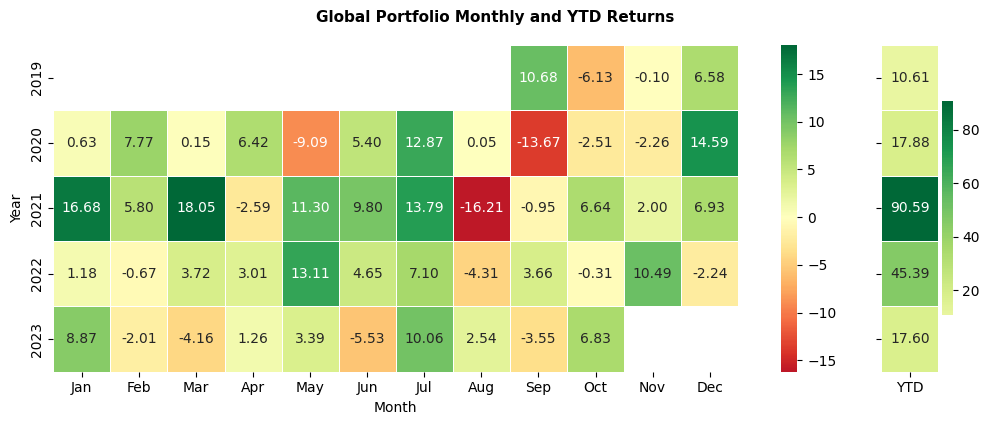

In [6]:
fig_gp_monthly_ret = leadlag_port.plot_monthly_returns(portfolio='GP', start_dt='2019-09-01', end_dt='2023-10-30', 
                                                       fig_size=(10, 4))

### __3.2. Clustered Portfolio__

For the clustered portfolio, we utilize the directed network built using the scoring matrix $S_{t-w}$ and denote it as $G_{t-w}$. We cluster this network using the Hermitian network clustering algorithm and construct a general portfolio for each cluster, treating each cluster as a small independent universe. As the algorithm may go long or short on the followers of each cluster, we consider the mean return of the universe of each cluster as the market and the offseting position.

This portfolio is referred to as the __clustered lead-lag portfolio__, as depicted in the figure below. Although the reference paper suggests a predetermined number of clusters for the algorithm, we chose to determine the optimal number of clusters using the silhouette score.

<center>
  <img src="../images/clustered_portfolio.png" style="width:450px;"/>
</center>

The crucial distinction lies in the approach to determining the number of clusters. In the reference papers, the number of clusters is predefined to facilitate comparisons with similar studies. In contrast, our approach in this repository avoids strict assumptions about the ideal cluster count. Instead, we leverage Silhouette scoring, allowing the algorithm to identify the optimal number of clusters. The only assumption we make is defining a range for the number of clusters, with a minimum set to 3 and a maximum to 10. This flexibility enhances the adaptability of our clustering methodology.

In [7]:
# Cluster directed networks using Hermitian algorithm
leadlag_port.cluster_directed_nets(k_min=3, k_max=10)

# Consider 20% for leaders and followers selection
leadlag_port.find_cp_leaders_followers(selection_percentile=0.2)

# Backtest the clustered portfolio
leadlag_port.backtest_cp()

Clustering Lead-Lag Networks Using Hermitian Algorithm: 100%|██████████| 1537/1537 [07:39<00:00,  3.35it/s]
Generating Backtest Results for Clustered Portfolio: 100%|██████████| 1536/1536 [00:05<00:00, 284.76it/s]


The clustered portfolio backtest data encompasses the following information, which will be utilized for comparison with other portfolios at the end of this notebook:

In [8]:
leadlag_port.cp_data

,Entry,Exit,PRet,PnL
Date,,,,
2019-08-22,2019-08-21,2019-08-22,0.007835,1.007835
2019-08-23,2019-08-22,2019-08-23,-0.004348,1.003453
2019-08-24,2019-08-23,2019-08-24,-0.006505,0.996926
2019-08-25,2019-08-24,2019-08-25,0.000372,0.997296
2019-08-26,2019-08-25,2019-08-26,-0.003694,0.993612
...,...,...,...,...
2023-10-31,2023-10-30,2023-10-31,0.007374,4.295576
2023-11-01,2023-10-31,2023-11-01,0.009431,4.336088
2023-11-02,2023-11-01,2023-11-02,0.002712,4.347847


Now, let's examine the monthly returns of the clustered portfolio. Please note that due to incomplete data for the months of August 2019 and November 2023 in the backtest period, we have excluded those months from this visualization:

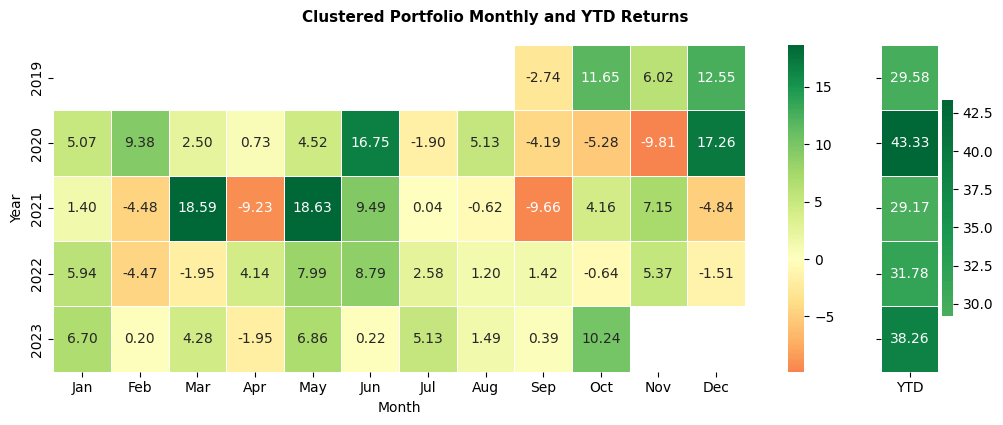

In [9]:
fig_cp_monthly_ret = leadlag_port.plot_monthly_returns(portfolio='CP', start_dt='2019-09-01', end_dt='2023-10-30', 
                                                       fig_size=(10, 4))

Now, we can compare the performance of the clustered and global portfolio, over time:

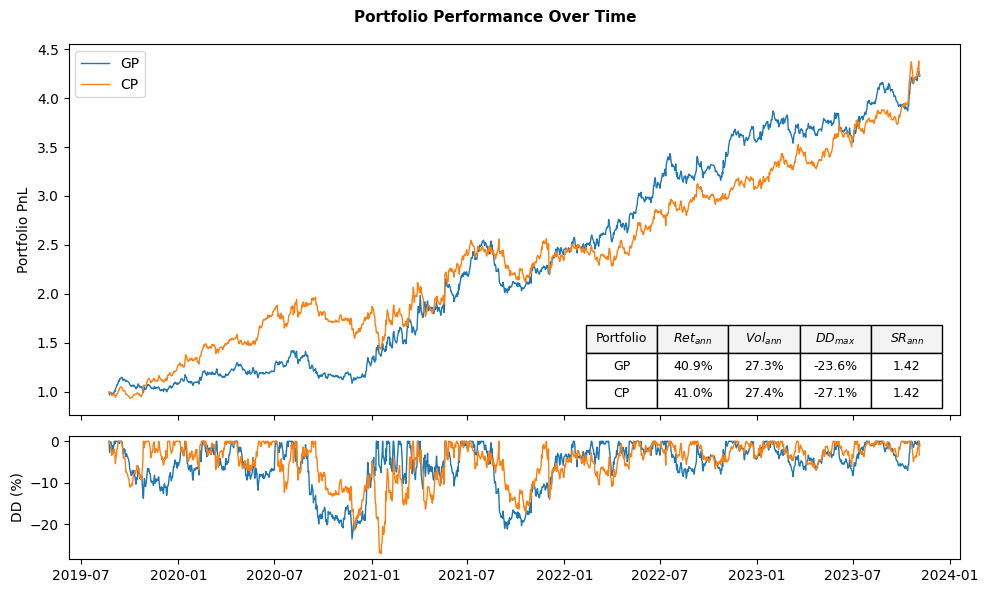

In [10]:
fig_gp_cp_perf = leadlag_port.plot_portfolio_performance(rf=0.02, start_dt='2019-08-22', end_dt='2023-11-04', 
                                                         cp=True, gcp=False, fig_size=(10,6))

### __3.3. Global Clustered Portfolio (GCP)__

The global-clustered portfolio is akin to the clustered portfolio as it utilizes the directed network $G_{t-w}$ and incorporates clustering. The key distinction lies in its approach to clusters; unlike the Clustered Portfolio, the Global Clustered Portfolio does not treat clusters as independent universes. Instead, it aggregates all leaders and followers from the clusters and then constructs a portfolio in the same manner as the Global Portfolio.

This portfolio, referred to as the __Global Clustered Lead-Lag Portfolio__, is illustrated in the figure below. While the reference paper suggests a predetermined number of clusters for the algorithm, we chose to initially set the minimum number of clusters to 3. Subsequently, we allowed the Hermitian algorithm to determine the optimal number of clusters using the silhouette score. Please note that the Global Clustered Portfolio is a proposition introduced in this repository and is not included in the reference paper.

<center>
  <img src="../images/golbal_clustered_portfolio.png" style="width:600px;"/>
</center>

In [11]:
# # Cluster directed networks using Hermitian algorithm with minimum of 3 clusters
# leadlag_port.cluster_directed_nets(k_min=3, k_max=10)

# # Consider 20% for leaders and followers selection
# leadlag_port.find_cp_leaders_followers(selection_percentile=0.2)

# Backtest the global clustered portfolio
leadlag_port.backtest_gcp()

Generating Backtest Results for Global Clustered Portfolio: 100%|██████████| 1537/1537 [00:01<00:00, 815.60it/s]


In [12]:
leadlag_port.gcp_data

,Entry,Exit,LRet,FRet,MktRet,PRet,FPnL,MktPnL,PnL
Date,,,,,,,,,
2019-08-22,2019-08-21,2019-08-22,-0.033201,0.023267,0.031588,0.008321,1.023267,1.031588,1.008321
2019-08-23,2019-08-22,2019-08-23,0.066731,0.007706,0.010609,-0.002903,1.031152,1.042532,1.005394
2019-08-24,2019-08-23,2019-08-24,0.016350,-0.000779,0.004170,-0.004950,1.030349,1.046880,1.000417
2019-08-25,2019-08-24,2019-08-25,0.022305,-0.003099,-0.022633,0.019534,1.027155,1.023186,1.019959
2019-08-26,2019-08-25,2019-08-26,-0.038732,0.006999,0.004151,-0.002848,1.034345,1.027434,1.017054
...,...,...,...,...,...,...,...,...,...
2023-11-01,2023-10-31,2023-11-01,-0.003361,0.021620,0.030477,0.008858,3.924675,8.311909,6.458587
2023-11-02,2023-11-01,2023-11-02,0.033793,-0.015572,-0.016512,0.000940,3.863559,8.174664,6.464655
2023-11-03,2023-11-02,2023-11-03,-0.025407,-0.000011,0.014107,0.014118,3.863516,8.289986,6.555925


The global clustered portfolio backtest data encompasses the following information, which will be utilized for comparison with other portfolios at the end of this notebook:

Now, let's examine the monthly returns of the global clustered portfolio. Please note that due to incomplete data for the months of August 2019 to November 2023 in the backtest period, we have excluded those months from this visualization:

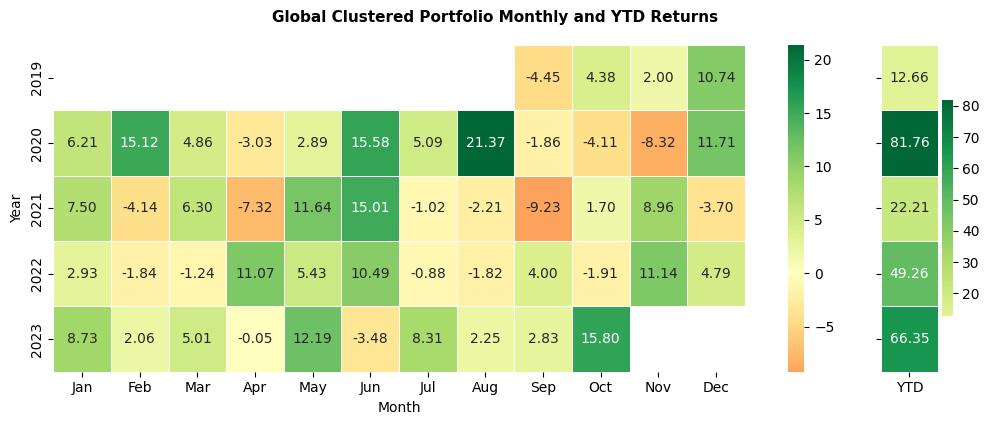

In [13]:
fig_gcp_monthly_ret = leadlag_port.plot_monthly_returns(portfolio='GCP', start_dt='2019-09-01', end_dt='2023-10-30', 
                                                        fig_size=(10, 4))

Now, we can compare the performance of the global clustered and global portfolio, over time:

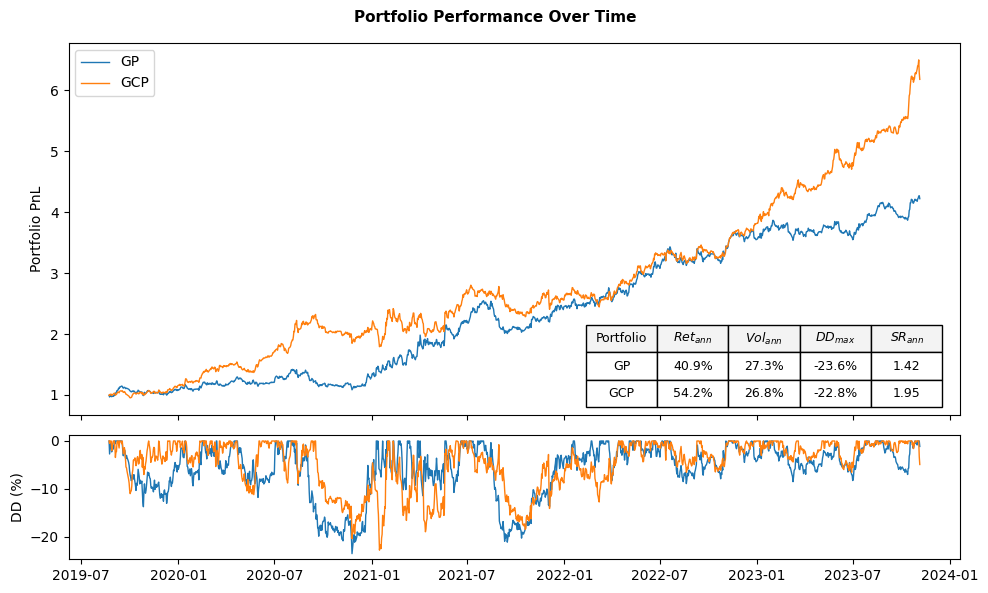

In [14]:
fig_gcp_cp_perf = leadlag_port.plot_portfolio_performance(rf=0.02, start_dt='2019-08-22', end_dt='2023-11-04', 
                                                          cp=False, gcp=True, fig_size=(10,6))

## __4. Conclusion__

In this repository, we have implemented a cutting-edge, entirely data-driven methodology designed to identify both linear and nonlinear lead-lag relationships within a universe of cryptocurrencies. This approach utilizes the Lévy area between pairs of cryptocurrency returns to deduce the likely leader within each pair and quantify the strength of this relationship. We have constructed portfolios that use the past returns of the leaders to determine positions on the followers, demonstrating their ability to generate economically significant performances.

While this repo intentionally kept the portfolio construction straightforward, future work could involve exploring sophisticated portfolio construction methods. These advanced techniques aim to optimize portfolio positions based on the lead-lag relationships uncovered by the methodology. Exploring a more realistic market proxy within the cryptocurrency market is another interesting avenue for future research. One approach could involve employing [Fast Pattern Matching](https://stumpy.readthedocs.io/en/latest/Tutorial_Pattern_Matching.html) to identify a cryptocurrency within the universe that exhibits behavior closest to the market proxy. 